In [1]:
import sympy as sym
import numpy as np
from sympy.polys.monomials import itermonomials
from sympy.functions.combinatorial.factorials import binomial

sym.init_printing()

In [2]:
assert sym.__version__ == '1.1.1'

In [3]:
import imp
macaulay = imp.load_source('macaulay', '../src/macaulay.py')

In [4]:
a_1_1, a_1_2, a_1_3, a_2_2, a_2_3, a_3_3 = sym.symbols('a_1_1, a_1_2, a_1_3, a_2_2, a_2_3, a_3_3')
b_1_1, b_1_2, b_1_3, b_2_2, b_2_3, b_3_3 = sym.symbols('b_1_1, b_1_2, b_1_3, b_2_2, b_2_3, b_3_3')
c_1, c_2, c_3 = sym.symbols('c_1, c_2, c_3')
x, y, z = sym.symbols('x, y, z')

In [5]:
variables = [x, y, z]

In [6]:
f_1 = sym.lambdify((x, y, z), a_1_1 * x ** 2 + a_1_2 * x * y + a_1_3 * x * z \
                   + a_2_2 * y ** 2 + a_2_3 * y * z + a_3_3 * z ** 2)

In [7]:
f_2 = sym.lambdify((x, y, z), b_1_1 * x ** 2 + b_1_2 * x * y + b_1_3 * x * z \
                   + b_2_2 * y ** 2 + b_2_3 * y * z + b_3_3 * z ** 2)

In [8]:
f_3 = sym.lambdify((x, y, z), c_1 * x + c_2 * y + c_3 * z) 

In [9]:
polynomials = [f_1, f_2, f_3]
mac = macaulay.MacaulayResultant(polynomials, variables)

In [10]:
mac.get_row_coefficients()

In [11]:
mac.monomials_size

In [12]:
monomial_set = mac.get_monomials_set()

In [13]:
monomial_set

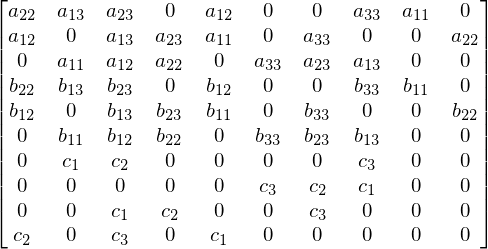

In [14]:
A = mac.get_matrix()
A

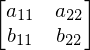

In [15]:
M = mac.get_submatrix(A)
M

In [16]:
M.det()

Examples
--------

In [17]:
x, y, z = sym.symbols("x, y, z")

p = sym.lambdify((x, y, z), x ** 2 + y - z)
q = sym.lambdify((x, y, z), x + y ** 2 - z)
h = sym.lambdify((x, y, z), 2 * x + 2 * y - z ** 2)
polynomials = [p, q, h]
variables = [x, y, z]

In [18]:
polynomials = [p, q, h]
mac = macaulay.MacaulayResultant(polynomials, [x, y, z])

In [20]:
monomial_set = mac.get_monomials_set()

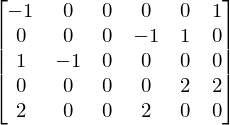

In [21]:
A = mac.get_matrix()
A

In [23]:
M = mac.get_submatrix(A)
M